<h2>Visualizing Birthday of Hong Kongers</h2>
<p>The story begins when I saw the interesting picture shared by Chris Hadfield (See Below) and wonder if I could do the same for Hong Kongers.</p>

<img src="https://scontent.fsyd4-1.fna.fbcdn.net/v/t1.0-9/163677741_284707846355926_8139899004885134793_o.jpg?_nc_cat=1&ccb=1-3&_nc_sid=730e14&_nc_ohc=fZcs6YvcFrAAX-NxFHt&_nc_ht=scontent.fsyd4-1.fna&oh=857af75b4db30b9e5282d65fa0792a45&oe=607F1FCC">

<p>I then came across with an <a href="https://www.inmediahk.net/node/1057804">article</a> wrote by Carpier Leung.</p>

<p>So here we go!</p> 

Reference:
https://www.statistics.gov.hk/pub/B10100022020MM03B0100.pdf
https://www.statistics.gov.hk/pub/B10100022021MM03B0100.pdf

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('dataset/birth_by_month.csv')

<p>Let's have a look at the raw data</p>

<p>It was a bit messy from the time I get it from Hong Kong Government website, I pre-preprocessed it by removing some of their coding and also changing the sex from sex_01 and sex_01 to 0 and 1, which represents male and female respectively. Originally I was thinking to do a graph for each sex, but I guess I would just do a combined sex first.</p>

In [13]:
df

,year,month,sex,monthly_total
0,2019,1,0,2566
1,2019,2,0,2008
2,2019,3,0,2242
3,2019,4,0,2256
4,2019,5,0,2394
5,2019,6,0,2139
6,2019,7,0,2244
7,2019,8,0,2278
8,2019,9,0,2269
9,2019,10,0,2484


In [14]:
df_2019 = df[df['year'] == 2019].copy()
df_2020 = df[df['year'] == 2020].copy()

In [15]:
df_2019 = df_2019.groupby(['month']).sum()
df_2020 = df_2020.groupby(['month']).sum()
df_2019.reset_index(inplace=True)
df_2020.reset_index(inplace=True)
df_2019.drop(columns = ['year','sex'], inplace=True)
df_2020.drop(columns = ['year','sex'], inplace=True)
df_2019.rename(columns={"monthly_total": "2019"}, inplace = True)
df_2020.rename(columns={"monthly_total": "2020"}, inplace = True)

<p>Raw data was bit messy, so this is what we got:</p>

In [16]:
df_2019

,month,2019
0,1,4925
1,2,3907
2,3,4371
3,4,4407
4,5,4590
5,6,4143
6,7,4232
7,8,4342
8,9,4293
9,10,4744


<p>Both looks okay now, so we should now concat the two dataframe as one. I think there should be a smarter way to do this (e.g. removing duplicate cols), but I would just do it in a less efficient way anyway:</p>

In [17]:
year_df = pd.concat([df_2019, df_2020['2020']], axis = 1)
year_df.set_index('month', inplace = True)

<p>Then we shall create the heatmap-style plot!</p>

In [18]:
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

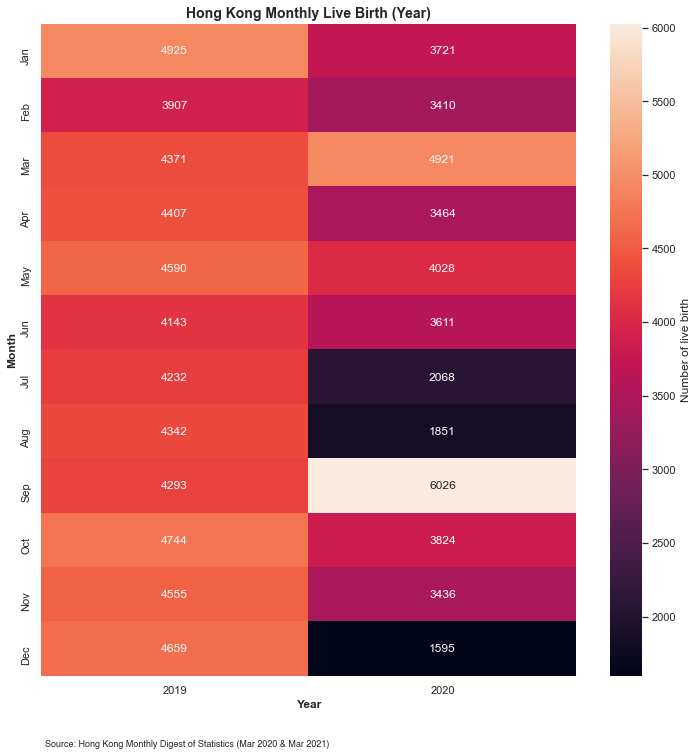

In [19]:
p1 = sns.heatmap(year_df, annot=True, fmt="d", cmap="rocket", square = False, cbar_kws={'label': 'Number of live birth'})
p1.axes.set_title("Hong Kong Monthly Live Birth (Year)" ,weight='bold',fontsize=14)
sns.set(font="helvetica")
p1.set_xlabel("Year",fontsize=12 ,weight='bold')
p1.set_ylabel("Month",fontsize=12,weight='bold')
p1.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
p1.text(0.015, 13.3,'Source: Hong Kong Monthly Digest of Statistics (Mar 2020 & Mar 2021)', fontsize=9)
sns.set(rc={'figure.figsize':(15,15)})

In [20]:
# Save the figure!

p1.get_figure().savefig('output.png')